In [1]:
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline 

In [2]:
df = pd.read_excel("Test 2_Water Test Database_Samples.xlsx")

In [3]:
df.head()

,SN,Tested By:,Test Location:,Client Sample ID:*,Location,Total Dissolved Solids (TDS),Total Alkalinity,Total Hardness
0,1,MLA/ACP/VK/SAK,Matterlab- Kozhikode,Well Water (Drinking Purpose),"11.656327790598143, 75.6000296078525",219.0,56.0,96.0
1,2,Matter Lab-Kozhikode,Matter Lab-Kozhikode,NaN,"11.224568381857583, 75.8052815977072",342.0,202.0,284.0
2,3,Approved Subcontract Lab,NaN,NaN,"11.215865685756965, 75.79722292521353",295.0,129.0,153.0
3,4,Approved Subcontract Lab,NaN,NaN,"11.233703153064157, 75.78886539951874",341.0,97.0,244.0
4,5,Approved Subcontract Lab,NaN,NaN,"11.221158758520716, 75.79675909264748",212.0,151.0,168.0


In [41]:
df.isna().sum()

SN                               0
Tested By:                       0
Test Location:                  27
Client Sample ID:*              14
Location                         0
Total Dissolved Solids (TDS)     0
Total Alkalinity                 0
Total Hardness                   0
dtype: int64

In [4]:
df_1 = df.loc[:, "Location" : "Total Hardness"]
df_1

,Location,Total Dissolved Solids (TDS),Total Alkalinity,Total Hardness
0,"11.656327790598143, 75.6000296078525",219.0,56.0,96.0
1,"11.224568381857583, 75.8052815977072",342.0,202.0,284.0
2,"11.215865685756965, 75.79722292521353",295.0,129.0,153.0
3,"11.233703153064157, 75.78886539951874",341.0,97.0,244.0
4,"11.221158758520716, 75.79675909264748",212.0,151.0,168.0
...,...,...,...,...
57,"11.24088431773026, 75.8141496892483",76.7,12.0,34.0
58,"11.400610062991557, 75.72923179745888",184.5,106.0,96.0
59,"10.928034326753007, 76.1003636931557",35.8,14.0,15.0
60,"11.255532454128202, 75.79630061924655",211.0,26.0,74.0


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      62 non-null     object 
 1   Total Dissolved Solids (TDS)  62 non-null     float64
 2   Total Alkalinity              62 non-null     float64
 3   Total Hardness                62 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.1+ KB


In [6]:
# Extract latitude and longitude into separate columns
df_1[["Latitude" , "Longitude"]] = df_1["Location"].str.split(", " , expand=True)
df_1

,Location,Total Dissolved Solids (TDS),Total Alkalinity,Total Hardness,Latitude,Longitude
0,"11.656327790598143, 75.6000296078525",219.0,56.0,96.0,11.656327790598143,75.6000296078525
1,"11.224568381857583, 75.8052815977072",342.0,202.0,284.0,11.224568381857583,75.8052815977072
2,"11.215865685756965, 75.79722292521353",295.0,129.0,153.0,11.215865685756965,75.79722292521353
3,"11.233703153064157, 75.78886539951874",341.0,97.0,244.0,11.233703153064157,75.78886539951874
4,"11.221158758520716, 75.79675909264748",212.0,151.0,168.0,11.221158758520716,75.79675909264748
...,...,...,...,...,...,...
57,"11.24088431773026, 75.8141496892483",76.7,12.0,34.0,11.24088431773026,75.8141496892483
58,"11.400610062991557, 75.72923179745888",184.5,106.0,96.0,11.400610062991557,75.72923179745888
59,"10.928034326753007, 76.1003636931557",35.8,14.0,15.0,10.928034326753007,76.1003636931557
60,"11.255532454128202, 75.79630061924655",211.0,26.0,74.0,11.255532454128202,75.79630061924655


In [7]:
df_1 = df_1.drop("Location" , axis = 1)

In [8]:
# Convert latitude and longitude columns to float
df_1["Latitude"]  = df_1["Latitude"].astype(float)
df_1["Longitude"] = df_1["Longitude"].astype(float)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Total Dissolved Solids (TDS)  62 non-null     float64
 1   Total Alkalinity              62 non-null     float64
 2   Total Hardness                62 non-null     float64
 3   Latitude                      62 non-null     float64
 4   Longitude                     62 non-null     float64
dtypes: float64(5)
memory usage: 2.5 KB


In [9]:
df_1 = df_1[["Latitude" , "Longitude" , "Total Dissolved Solids (TDS)" , "Total Alkalinity" , "Total Hardness"]]

In [10]:
df_1


,Latitude,Longitude,Total Dissolved Solids (TDS),Total Alkalinity,Total Hardness
0,11.656328,75.600030,219.0,56.0,96.0
1,11.224568,75.805282,342.0,202.0,284.0
2,11.215866,75.797223,295.0,129.0,153.0
3,11.233703,75.788865,341.0,97.0,244.0
4,11.221159,75.796759,212.0,151.0,168.0
...,...,...,...,...,...
57,11.240884,75.814150,76.7,12.0,34.0
58,11.400610,75.729232,184.5,106.0,96.0
59,10.928034,76.100364,35.8,14.0,15.0
60,11.255532,75.796301,211.0,26.0,74.0


## `Visualizing and exploring the data`  

`*since the location are same focus on the colour shift in each location that will tell us value of test results`*

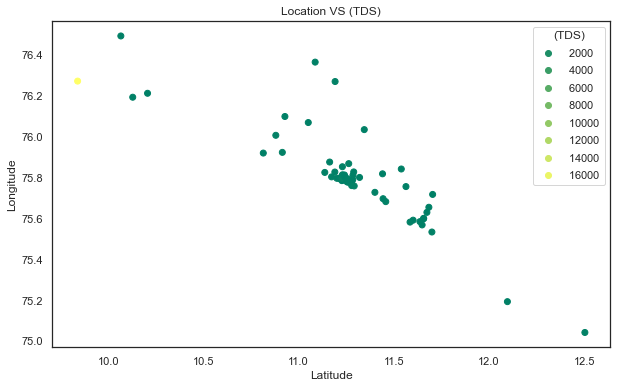

In [364]:
##CREATE THE PLOT
fig , ax = plt.subplots(figsize = (10,6))
##DATA PLOTING
new_PLOT = ax.scatter(x = df_1["Latitude"],
                      y = df_1["Longitude"], 
                      c = df_1["Total Dissolved Solids (TDS)"],
                      marker='o', 
                      cmap='summer')
##CUSTOMIZE THE PLOT 
ax.set( title="Location VS (TDS)",
        xlabel= "Latitude",
        ylabel= "Longitude");
##adding legends in the graph
ax.legend(*new_PLOT.legend_elements() , title = "(TDS)" );

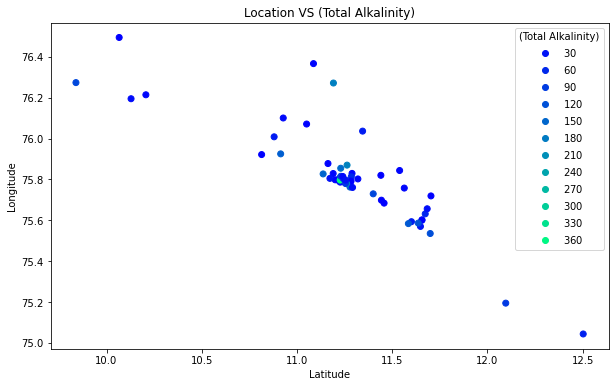

In [37]:
##CREATE THE PLOT
fig , ax = plt.subplots(figsize = (10,6))
##DATA PLOTING
new_PLOT = ax.scatter(x = df_1["Latitude"] ,
                      y = df_1["Longitude"], 
                      c = df_1["Total Alkalinity"],
                      marker='o', 
                      cmap='winter')
##CUSTOMIZE THE PLOT 
ax.set( title="Location VS (Total Alkalinity)",
        xlabel= "Latitude",
        ylabel= "Longitude");
##adding legends in the graph
ax.legend(*new_PLOT.legend_elements() , title = "(Total Alkalinity)" );

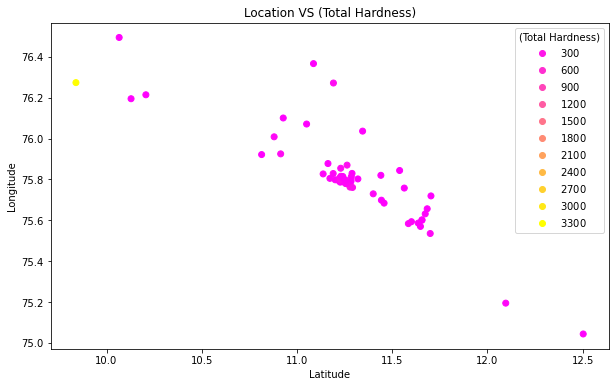

In [38]:
##CREATE THE PLOT
fig , ax = plt.subplots(figsize = (10,6))
##DATA PLOTING
new_PLOT = ax.scatter(x = df_1["Latitude"] ,
                      y = df_1["Longitude"], 
                      c = df_1["Total Hardness"],
                      marker='o', 
                      cmap='spring')
##CUSTOMIZE THE PLOT 
ax.set( title="Location VS (Total Hardness)",
        xlabel= "Latitude",
        ylabel= "Longitude");
##adding legends in the graph
ax.legend(*new_PLOT.legend_elements() , title = "(Total Hardness)" );

## `Exploring the data on the basis of each test results`

*`Explore Total Dissolved Solids (TDS) on the given data set`*

In [77]:
# Calculating statistics
mean_tds   = np.mean(df_1["Total Dissolved Solids (TDS)"])
max_tds    = np.max(df_1["Total Dissolved Solids (TDS)"])
min_tds    = np.min(df_1["Total Dissolved Solids (TDS)"])
median_tds = np.median(df_1["Total Dissolved Solids (TDS)"])

# Printing the calculated statistics
print("Mean TDS:", mean_tds)
print("Maximum TDS:", max_tds)
print("Minimum TDS:", min_tds)
print("Median TDS:", median_tds)

Mean TDS: 460.29999999999995
Maximum TDS: 17358.0
Minimum TDS: 12.7
Median TDS: 162.5


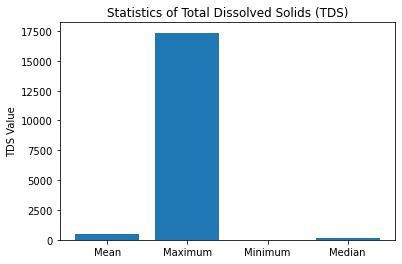

In [83]:
# now lets try to plot the above stats
# Creating a bar plot
stats = ["Mean", "Maximum", "Minimum", "Median"]
values = [mean_tds, max_tds, min_tds, median_tds]
plt.bar(stats, values)
plt.ylabel("TDS Value")
plt.title("Statistics of Total Dissolved Solids (TDS)")
plt.show()

In [80]:
# Calculating statistics
mean_alk   = np.mean(df_1["Total Alkalinity"])
max_alk    = np.max(df_1["Total Alkalinity"])
min_alk    = np.min(df_1["Total Alkalinity"])
median_alk = np.median(df_1["Total Alkalinity"])

# Printing the calculated statistics
print("Mean Alkalinity:", mean_alk)
print("Maximum Alkalinity:", max_alk)
print("Minimum Alkalinity:", min_alk)
print("Median Alkalinity:", median_alk)

Mean Alkalinity: 67.66612903225808
Maximum Alkalinity: 372.0
Minimum Alkalinity: 2.0
Median Alkalinity: 41.15


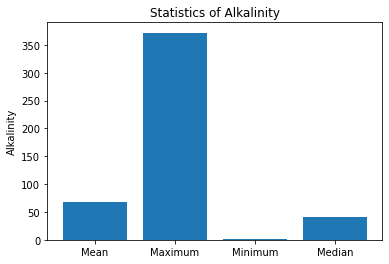

In [84]:
# now lets try to plot the above stats
# Creating a bar plot
stats_1 = ["Mean", "Maximum", "Minimum", "Median"]
values_1 = [mean_alk, max_alk, min_alk, median_alk]
plt.bar(stats_1, values_1)
plt.ylabel("Alkalinity")
plt.title("Statistics of Alkalinity")
plt.show()

In [79]:
# Calculating statistics
mean_har   = np.mean(df_1["Total Hardness"])
max_har    = np.max(df_1["Total Hardness"])
min_har    = np.min(df_1["Total Hardness"])
median_har = np.median(df_1["Total Hardness"])

# Printing the calculated statistics
print("Mean Hardness:", mean_har)
print("Maximum Hardness:", max_har)
print("Minimum Hardness:", min_har)
print("Median Hardness:", median_har)

Mean Hardness: 140.69193548387096
Maximum Hardness: 3300.0
Minimum Hardness: 4.0
Median Hardness: 69.0


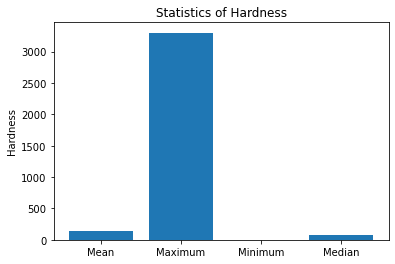

In [86]:
# now lets try to plot the above stats
# Creating a bar plot
stats_2 = ["Mean", "Maximum", "Minimum", "Median"]
values_2 = [mean_har, max_har, min_har, median_har]
plt.bar(stats_2, values_2)
plt.ylabel("Hardness")
plt.title("Statistics of Hardness")
plt.show()

In [117]:
df_1.dtypes

Latitude                        float64
Longitude                       float64
Total Dissolved Solids (TDS)    float64
Total Alkalinity                float64
Total Hardness                  float64
dtype: object

In [88]:
# Make a correlation matrix
df_1.corr()

,Latitude,Longitude,Total Dissolved Solids (TDS),Total Alkalinity,Total Hardness
Latitude,1.000000,-0.865095,-0.437724,0.026025,-0.436663
Longitude,-0.865095,1.000000,0.251613,-0.070248,0.245411
Total Dissolved Solids (TDS),-0.437724,0.251613,1.000000,0.109846,0.991757
Total Alkalinity,0.026025,-0.070248,0.109846,1.000000,0.197716
Total Hardness,-0.436663,0.245411,0.991757,0.197716,1.000000


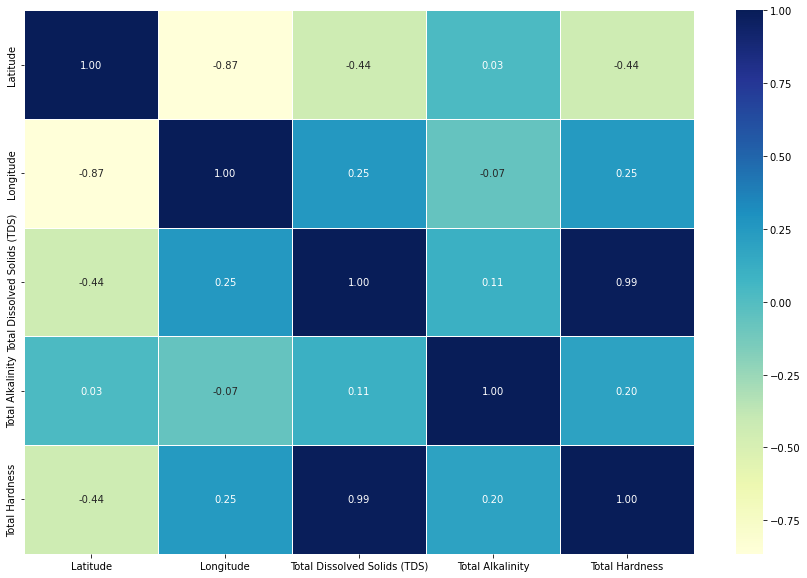

In [93]:
# Let's make our correlation matrix a little prettier and more easy to visualize
corr_matrix = df_1.corr()
fig , ax = plt.subplots(figsize = (15,10) )
ax = sns.heatmap(corr_matrix ,
                annot= True,
                linewidths=0.5,
                fmt= ".2f",
                cmap = "YlGnBu");
bottom, top = ax.get_ylim()


In [94]:
df_1.columns

Index(['Latitude', 'Longitude', 'Total Dissolved Solids (TDS)',
       'Total Alkalinity', 'Total Hardness'],
      dtype='object')

Now we can use `Seaborn Pairplot`

*The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.*

In [98]:
df_1

,Latitude,Longitude,Total Dissolved Solids (TDS),Total Alkalinity,Total Hardness
0,11.656328,75.600030,219.0,56.0,96.0
1,11.224568,75.805282,342.0,202.0,284.0
2,11.215866,75.797223,295.0,129.0,153.0
3,11.233703,75.788865,341.0,97.0,244.0
4,11.221159,75.796759,212.0,151.0,168.0
...,...,...,...,...,...
57,11.240884,75.814150,76.7,12.0,34.0
58,11.400610,75.729232,184.5,106.0,96.0
59,10.928034,76.100364,35.8,14.0,15.0
60,11.255532,75.796301,211.0,26.0,74.0


`Visualizing Total dissolved solids data variations with others columns`

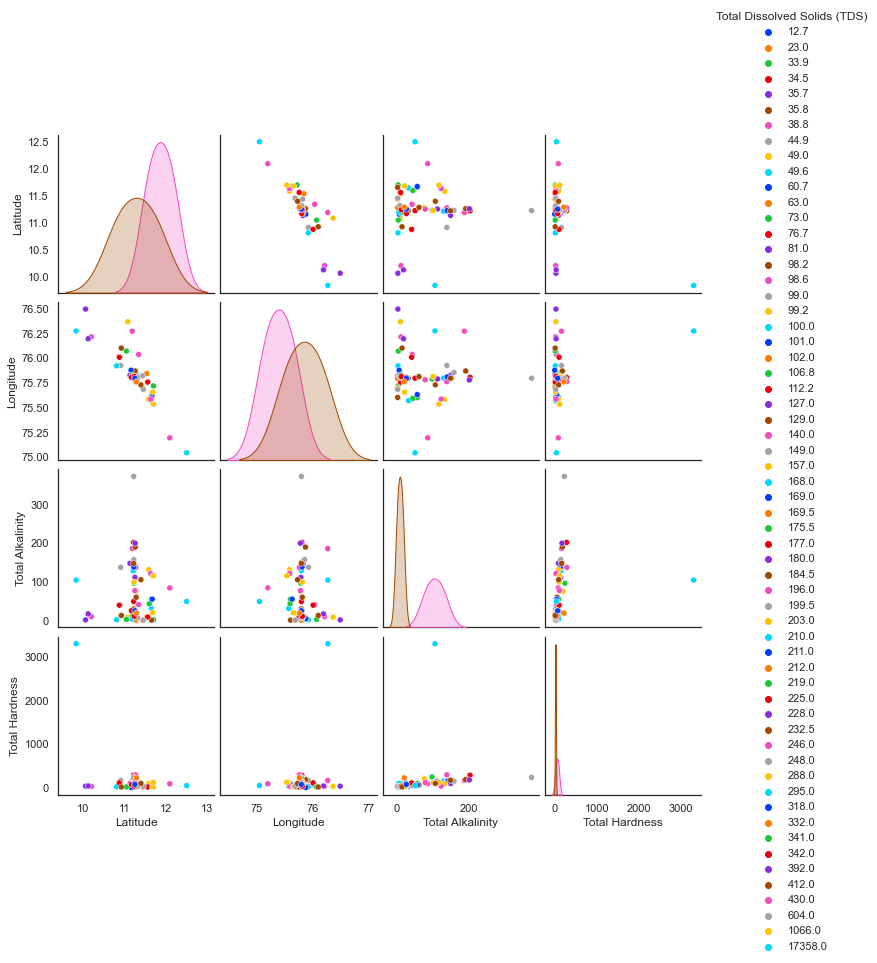

In [109]:
sns.set(style = "white" )
#since the dataset is quite small as compared to others we can directly use our DataFrame(df_1)
sns.pairplot(df_1 , hue= "Total Dissolved Solids (TDS)" , palette="bright");
# hue = Variable in “data“ to map plot aspects to different colors.
# palette = Set of colors for mapping the “hue“ variable. In case of a dict, the keys should be values in the “hue“ variable. vars: list of variable names, optional

`Visualizing Total Alkalinity variations with others columns`

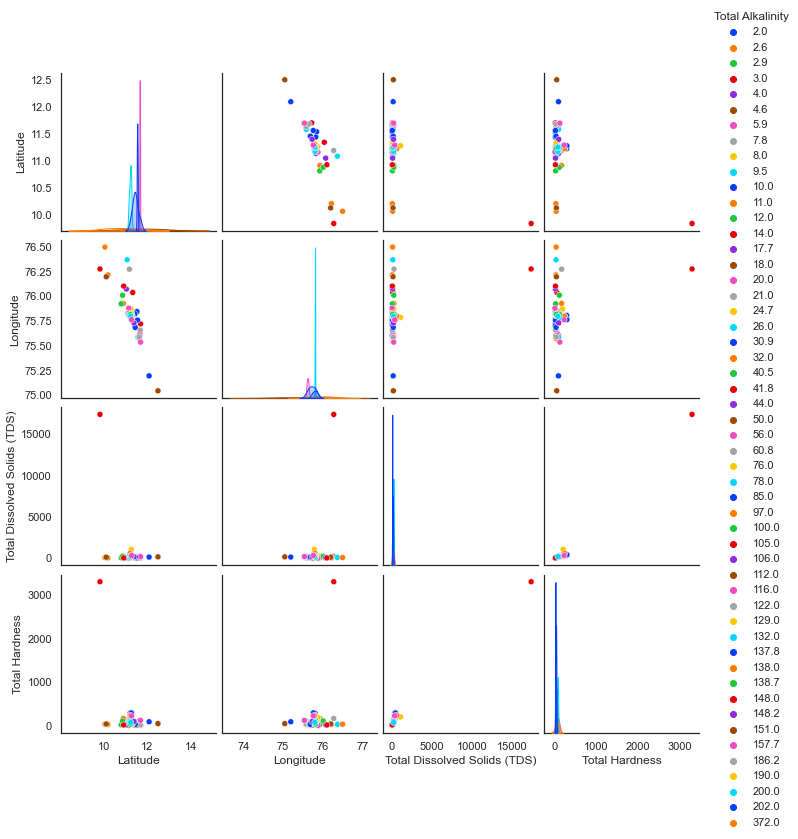

In [108]:
sns.set(style = "white" )
#since the dataset is quite small as compared to others we can directly use our DataFrame(df_1)
sns.pairplot(df_1 , hue= "Total Alkalinity" , palette="bright");
# hue = Variable in “data“ to map plot aspects to different colors.
# palette = Set of colors for mapping the “hue“ variable. In case of a dict, the keys should be values in the “hue“ variable. vars: list of variable names, optional

`Visualizing Total Hardness variations with others columns`

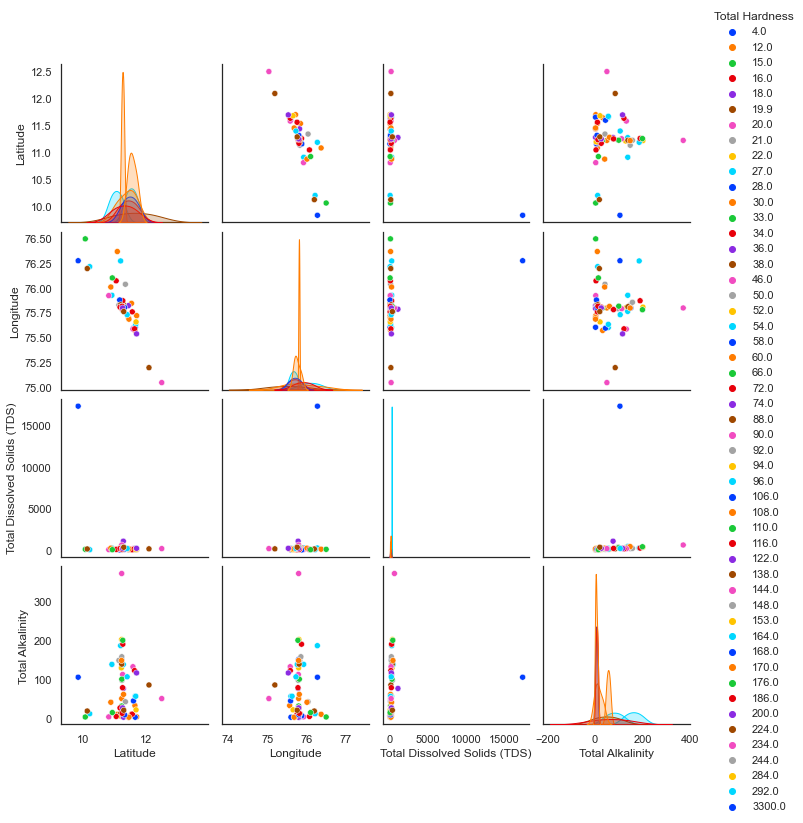

In [114]:
sns.set(style = "white" )
#since the dataset is quite small as compared to others we can directly use our DataFrame(df_1)

sns.pairplot(df_1 , hue= "Total Hardness" , palette="bright");
# hue = Variable in “data“ to map plot aspects to different colors.
# palette = Set of colors for mapping the “hue“ variable. In case of a dict, the keys should be values in the “hue“ variable. vars: list of variable names, optional

## `Visualizing all the columns variation with each other`

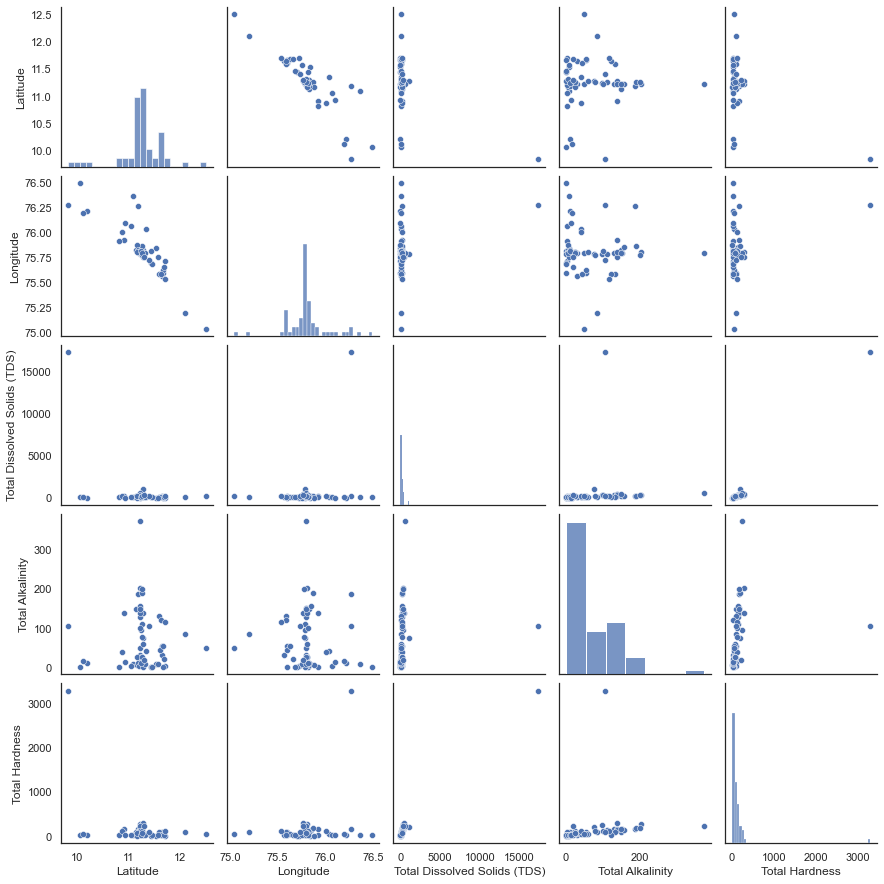

In [115]:
sns.set(style = "white" )
#since the dataset is quite small as compared to others we can directly use our DataFrame(df_1)
sns.pairplot(df_1 );

## MODELLING 


In [139]:
df_1

,Latitude,Longitude,Total Dissolved Solids (TDS),Total Alkalinity,Total Hardness
0,11.656328,75.600030,219.0,56.0,96.0
1,11.224568,75.805282,342.0,202.0,284.0
2,11.215866,75.797223,295.0,129.0,153.0
3,11.233703,75.788865,341.0,97.0,244.0
4,11.221159,75.796759,212.0,151.0,168.0
...,...,...,...,...,...
57,11.240884,75.814150,76.7,12.0,34.0
58,11.400610,75.729232,184.5,106.0,96.0
59,10.928034,76.100364,35.8,14.0,15.0
60,11.255532,75.796301,211.0,26.0,74.0


`Here we have 3 test results so we need to make three model which will predict three different results on the defined training datasets`

* *Total Dissolved Solids (TDS)*
* *Total Alkalinity*
* *Total Hardness*

# `Creating a model for predicting Total Dissolved solids(TDS)`

In [208]:
#splits the data into X and y 
X_1 = df_1.drop("Total Dissolved Solids (TDS)" , axis = 1)
y_1 = df_1["Total Dissolved Solids (TDS)"]

In [257]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split into train & test set
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1,
                                                        y_1,
                                                        test_size=0.4)

In [258]:
len(X_1train) , len(X_1test)

(37, 25)

*Now we've got our data split into training and test sets, it's time to build a machine learning model.*

*We'll train it (find the patterns) on the training set.*

*And we'll test it (use the patterns) on the test set.*

*We're going to try 4 different machine learning models:*


`1.Decision Tree Regressor`

`2.Random Forest Regressor`

`3.Support Vector Regression`

`4.Gradient Boosting Regression`

In [259]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

#Lets put our model in a dictionary 
models = { "Decision Tree"        : DecisionTreeRegressor(),
          
           "Random Forest"        : RandomForestRegressor() ,
          
           "Support Vector"       : SVR(),
          
           "Gradient Boosting"    : GradientBoostingRegressor() 
           
           }

#create a function to fit and score the models on train datasets
def fit_and_score_on_train_data (model , X_train, y_train):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    
    """
    
    # Set random seed
    np.random.seed(42)
    # make a dictionary to store the model scores
    model_scores = {}
    #create a loop for models
    for name , model in models.items():
        # fit the model 
        model.fit(X_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_train , y_train)
    return model_scores



#create a function to fit and score the models on test data
def fit_and_score_on_test_data (model , X_train, y_train , X_test , y_test):
    
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    
    """
    # Set random seed
    np.random.seed(42)
    # make a dictionary to store the model scores
    model_scores = {}
    #create a loop for models
    for name , model in models.items():
        # fit the model 
        model.fit(X_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test , y_test)
    return model_scores

In [260]:
model_scores_on_train_data = fit_and_score_on_train_data(model   = models,
                                           X_train = X_1train,
                                           y_train = y_1train)
model_scores_on_train_data

{'Decision Tree': 1.0,
 'Random Forest': 0.8250999111338373,
 'Support Vector': -0.03073563485458841,
 'Gradient Boosting': 0.9999897841042916}

In [262]:
model_scores_on_test_data = fit_and_score_on_test_data(model   = models,
                            X_train = X_1train,
                            y_train = y_1train,
                            X_test  = X_1test,
                            y_test  = y_1test)
model_scores_on_test_data

{'Decision Tree': 0.39944786169471436,
 'Random Forest': -0.6664613021329058,
 'Support Vector': -0.9157910154633089,
 'Gradient Boosting': 0.15939784178334582}

# `Decision Tree Regression :- For predicting (TDS)`

*scored highest on test dataset which was 30% of the total dataset*

***r2_score = 0.40*** 

In [337]:
# Using the correct model for predicting (TDS)
#set a seed
np.random.seed(0)
model_tds = DecisionTreeRegressor()
model_tds.fit(X_1train  , y_1train)
model_tds.score(X_1test , y_1test)

0.48535963590593734

In [338]:
#now getting a score(r2_score) of approx .48
X_1test

,Latitude,Longitude,Total Alkalinity,Total Hardness
50,11.684079,75.656096,21.0,22.0
56,11.320055,75.802129,8.0,28.0
0,11.656328,75.600030,56.0,96.0
57,11.240884,75.814150,12.0,34.0
5,11.648640,75.569658,32.0,30.0
48,11.050740,76.070794,4.0,16.0
16,11.226855,75.786542,17.7,21.0
12,11.289360,75.829135,7.8,19.9
25,11.344830,76.036127,41.8,50.0
59,10.928034,76.100364,14.0,15.0


In [302]:
# predicting the test-data set
model_tds.predict(X_1test)

array([ 63. ,  33.9, 157. , 102. , 140. ,  33.9,  33.9,  33.9, 102. ,
        38.8,  63. , 102. , 102. , 140. , 102. , 210. , 412. , 248. ,
       288. ,  33.9, 157. , 177. , 412. ,  33.9, 211. ])

In [340]:
data_1 = {"TDS_prediction" : model_tds.predict(X_1test)}
y_tds_preds = pd.DataFrame(data_1)
y_tds_preds

,TDS_prediction
0,63.0
1,33.9
2,157.0
3,102.0
4,140.0
5,33.9
6,33.9
7,33.9
8,102.0
9,38.8


In [346]:
#creating a csv file and storing it in the system
y_tds_preds.to_csv("TDS_model_prediction.csv")

***---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

# Creating a model for predicting Total Alkalinity

In [323]:
#splits the data into X and y 
X_2 = df_1.drop("Total Alkalinity" , axis =1)
y_2 = df_1["Total Alkalinity"]

In [324]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split into train & test set
X_2train, X_2test, y_2train, y_2test = train_test_split(X_2,
                                                        y_2,
                                                        test_size=0.4)

In [325]:
model_scores_on_train_data_alk = fit_and_score_on_train_data(model   = models,
                                                             X_train = X_2train,
                                                             y_train = y_2train)
model_scores_on_train_data_alk

{'Decision Tree': 1.0,
 'Random Forest': 0.9046403050430017,
 'Support Vector': -0.09016619354978483,
 'Gradient Boosting': 0.999740106858638}

In [326]:
model_scores_on_test_data_alk = fit_and_score_on_test_data(model   = models,
                                          X_train = X_2train,
                                          y_train = y_2train,
                                          X_test  = X_2test,
                                          y_test  = y_2test)
model_scores_on_test_data_alk

{'Decision Tree': -0.11939937293944203,
 'Random Forest': 0.2456170677327697,
 'Support Vector': -0.022419225120429598,
 'Gradient Boosting': -0.03141761590196235}

# `Random Forest Regression :- For predicting (Total Alkalinity)`

*scored highest on test dataset which was 30% of the total dataset*

***r2_score = 0.24***

In [335]:
# Using the correct model for predicting (TOTAL ALKALINITY)
#set a seed
np.random.seed(10)
model_TA = RandomForestRegressor()
model_TA.fit(X_2train  , y_2train)
model_TA.score(X_2test , y_2test)

0.36068855107248665

In [336]:
#now getting a score(r2_score) of approx 0.36
X_2test

,Latitude,Longitude,Total Dissolved Solids (TDS),Total Hardness
50,11.684079,75.656096,49.0,22.0
56,11.320055,75.802129,99.0,28.0
0,11.656328,75.600030,219.0,96.0
57,11.240884,75.814150,76.7,34.0
5,11.648640,75.569658,100.0,30.0
48,11.050740,76.070794,73.0,16.0
16,11.226855,75.786542,35.7,21.0
12,11.289360,75.829135,60.7,19.9
25,11.344830,76.036127,98.6,50.0
59,10.928034,76.100364,35.8,15.0


In [339]:
# predicting the test-data set
model_TA.predict(X_2test)

array([ 36.728,   3.261, 101.64 ,   3.891,  71.555,   6.272,   3.481,
         2.469,  21.973,   7.232,  62.479,  19.457,  27.176,  79.682,
        21.679,  35.087, 199.703, 138.805, 108.488,  14.915,  91.572,
        24.224, 150.122,  24.407,  36.17 ])

In [344]:
data_2 = {"TA_prediction" : model_TA.predict(X_2test)}
y_TA_preds = pd.DataFrame(data_2)
y_TA_preds

,TA_prediction
0,36.728
1,3.261
2,101.640
3,3.891
4,71.555
5,6.272
6,3.481
7,2.469
8,21.973
9,7.232


In [345]:
#creating a csv file and storing it in the system
y_TA_preds.to_csv("TA_model_prediction.csv")

***---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

# `Creating a model for predicting Total Hardness`

In [348]:
#splits the data into X and y 
X_3 = df_1.drop("Total Hardness" , axis = 1)
y_3 = df_1["Total Hardness"]

In [349]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split into train & test set
X_3train, X_3test, y_3train, y_3test = train_test_split(X_3,
                                                        y_3,
                                                        test_size=0.3)

In [350]:
model_scores_on_train_data_har = fit_and_score_on_train_data(model   = models,
                                                             X_train = X_3train,
                                                             y_train = y_3train)
model_scores_on_train_data_har

{'Decision Tree': 1.0,
 'Random Forest': 0.8332786262367711,
 'Support Vector': -0.027403963096036987,
 'Gradient Boosting': 0.9999555957382098}

In [275]:
model_scores_on_test_data_har = fit_and_score_on_test_data(model   = models,
                                          X_train = X_3train,
                                          y_train = y_3train,
                                          X_test  = X_3test,
                                          y_test  = y_3test)
model_scores_on_test_data_har

{'Decision Tree': 0.8368903839165882,
 'Random Forest': 0.8537616968430853,
 'Support Vector': -0.24658098503299297,
 'Gradient Boosting': 0.8852709157904632}

# `Gradient Boosting Regression :- For predicting (Total Hardness)`

*scored highest on test dataset which was 30% of the total dataset*

***r2_score = 0.89***

In [358]:
# Using the correct model for predicting (TOTAL ALKALINITY)
#set a seed
np.random.seed(42)
model_har = GradientBoostingRegressor()
model_har.fit(X_3train , y_3train)
model_har.score(X_3test , y_3test)

0.8846876437390035

In [359]:
#now getting a score(r2_score) of approx 0.89
X_3test

,Latitude,Longitude,Total Dissolved Solids (TDS),Total Alkalinity
50,11.684079,75.656096,49.0,21.0
56,11.320055,75.802129,99.0,8.0
0,11.656328,75.600030,219.0,56.0
57,11.240884,75.814150,76.7,12.0
5,11.648640,75.569658,100.0,32.0
48,11.050740,76.070794,73.0,4.0
16,11.226855,75.786542,35.7,17.7
12,11.289360,75.829135,60.7,7.8
25,11.344830,76.036127,98.6,41.8
59,10.928034,76.100364,35.8,14.0


In [361]:
# predicting the test-data set
model_har.predict(X_3test)

array([ 25.03460767,  33.58670004, 125.34145486,  31.57346607,
        38.17592362,  30.02445246,  25.92645297,  18.49431821,
        47.07964803,  22.45271857,   8.98846512,  55.89736852,
        77.01715074,  40.48462783,  46.23356047,  70.70142836,
       185.62833798, 176.3423874 ,  92.96838483])

In [362]:
data_3 = {"TH_prediction" : model_har.predict(X_3test)}
y_har_preds = pd.DataFrame(data_3)
y_har_preds

,TH_prediction
0,25.034608
1,33.586700
2,125.341455
3,31.573466
4,38.175924
5,30.024452
6,25.926453
7,18.494318
8,47.079648
9,22.452719


In [365]:
y_har_preds.to_csv("TH_model_prediction.csv")

# Feature Importance
`Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable.`

In [366]:
# Find feature importance of our best model
model_har.feature_importances_

array([7.11373801e-01, 4.82128103e-04, 2.85008819e-01, 3.13525218e-03])

In [373]:
model_TA.feature_importances_

array([0.11103482, 0.10060916, 0.17706195, 0.61129408])

In [372]:
model_tds.feature_importances_

array([1.41806161e-03, 1.19289903e-04, 1.90825195e-04, 9.98271823e-01])

In [369]:
# Helper function for plotting feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance") 
    ax.invert_yaxis()

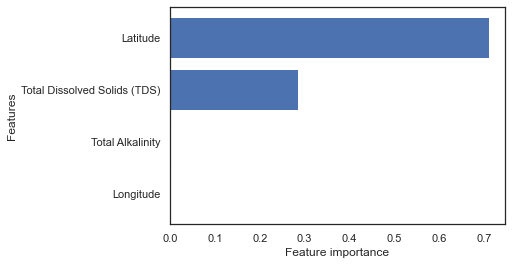

In [370]:
# feature importance for TOTAL HARDNESS PREDICTING MODEL
plot_features(X_3train.columns, model_har.feature_importances_)

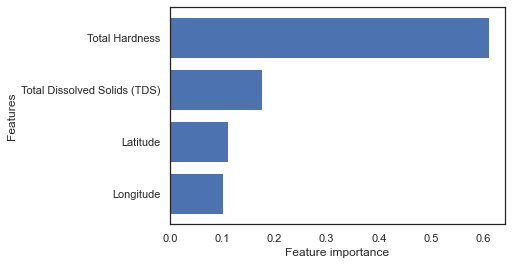

In [371]:
# feature importance for TOTAL ALKALINITY PREDICTING MODEL
plot_features(X_2train.columns, model_TA.feature_importances_)

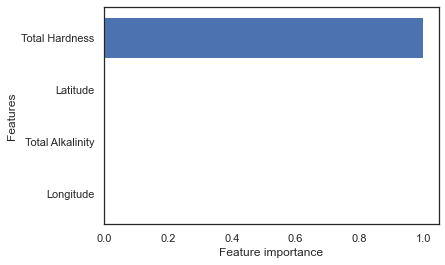

In [375]:
# feature importance for TDS PREDICTING MODEL
plot_features(X_1train.columns, model_tds.feature_importances_)